# Use different databases for the training and compare results

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## load and prepare data

In [4]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']
#print(f'{data2401}')
#print(f'{X_2401}')
#print(f'{Y_2401}')

## sobol sampling
data_sobol = pd.read_csv('CLEANED_sobolsampling-2048.csv')
data_sobol = data_sobol.drop(data_sobol.columns[0], axis=1)
X_sobol = data_sobol.drop('density', axis=1)
Y_sobol = data_sobol['density']
#print(f'{data_sobol}')
#print(f'{X_sobol}')
#print(f'{Y_sobol}')


## random integer
taken from another script

In [3]:
random_ints = [46, 40, 23, 29, 14, 78, 55, 33, 1, 61, 62, 39, 9, 25, 96, 95, 28, 27, 51, 0, 4, 39, 12, 41, 94, 70, 50, 18, 77, 37]
#print(f'{np.sort(random_ints)}')

## split data by using different random states

In [5]:
## grid sampling 1296
X_TRAINs1296 = []
X_TESTs1296 = []
Y_TRAINs1296 = []
Y_TESTs1296 = []

## grid sampling 2401
X_TRAINs2401 = []
X_TESTs2401 = []
Y_TRAINs2401 = []
Y_TESTs2401 = []

## sobol sampling
X_TRAINsSobol = []
X_TESTsSobol = []
Y_TRAINsSobol = []
Y_TESTsSobol = []

for i in random_ints:
    #print(f'{i}')
    X_train, X_test, Y_train, Y_test = train_test_split(X_1296, Y_1296, test_size=0.05, random_state=i)
    X_TRAINs1296.append(X_train)
    X_TESTs1296.append(X_test)
    Y_TRAINs1296.append(Y_train)
    Y_TESTs1296.append(Y_test)

    X_train, X_test, Y_train, Y_test = train_test_split(X_2401, Y_2401, test_size=0.05, random_state=i)
    X_TRAINs2401.append(X_train)
    X_TESTs2401.append(X_test)
    Y_TRAINs2401.append(Y_train)
    Y_TESTs2401.append(Y_test)

    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol, Y_sobol, test_size=0.05, random_state=i)
    X_TRAINsSobol.append(X_train)
    X_TESTsSobol.append(X_test)
    Y_TRAINsSobol.append(Y_train)
    Y_TESTsSobol.append(Y_test)

## create and train models

In [9]:
## grid sampling 1296
MODELs1296 = []
Y_PREDICTIONs1296 = []
RMSEs1296 = []
R2s1296 = []

## grid sampling 2401
MODELs2401 = []
Y_PREDICTIONs2401 = []
RMSEs2401 = []
R2s2401 = []

## sobol sampling
MODELsSobol = []
Y_PREDICTIONsSobol = []
RMSEsSobol = []
R2sSobol = []

for i in range(0, len(random_ints)):
    ## creation of the pipeline
    model1296 = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    #
    model2401 = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    #
    modelSobol = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

    ## train/fit the model
    model1296.fit(X_TRAINs1296[i], Y_TRAINs1296[i])
    MODELs1296.append(model1296)
    #
    model2401.fit(X_TRAINs2401[i], Y_TRAINs2401[i])
    MODELs2401.append(model2401)
    #
    modelSobol.fit(X_TRAINsSobol[i], Y_TRAINsSobol[i])
    MODELsSobol.append(modelSobol)
    
    ## prediction using the test set
    Y_prediction1296 = model1296.predict(X_TESTs1296[i])
    Y_PREDICTIONs1296.append(Y_prediction1296)
    #
    Y_prediction2401 = model2401.predict(X_TESTs2401[i])
    Y_PREDICTIONs2401.append(Y_prediction2401)
    #
    Y_predictionSobol = modelSobol.predict(X_TESTsSobol[i])
    Y_PREDICTIONsSobol.append(Y_predictionSobol)
    
    ## evaluate with Y_test
    rmse1296 = np.sqrt(mean_squared_error(Y_TESTs1296[i], Y_prediction1296))
    r21296 = r2_score(Y_TESTs1296[i], Y_prediction1296)
    RMSEs1296.append(rmse1296)
    R2s1296.append(r21296)
    #
    rmse2401 = np.sqrt(mean_squared_error(Y_TESTs2401[i], Y_prediction2401))
    r22401 = r2_score(Y_TESTs2401[i], Y_prediction2401)
    RMSEs2401.append(rmse2401)
    R2s2401.append(r22401)
    #
    rmseSobol = np.sqrt(mean_squared_error(Y_TESTsSobol[i], Y_predictionSobol))
    r2Sobol = r2_score(Y_TESTsSobol[i], Y_predictionSobol)
    RMSEsSobol.append(rmseSobol)
    R2sSobol.append(r2Sobol)


## Plot RMSEs and R2s

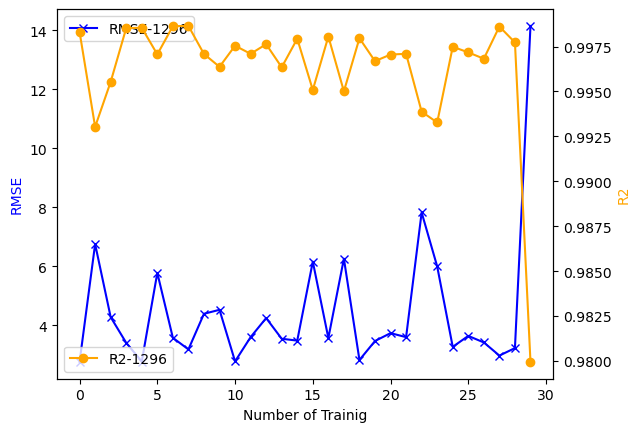

In [12]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(RMSEs1296, '-x', color='blue', label='RMSE-1296')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2s1296, '-o', color='orange', label='R2-1296')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('GRID1296-Training_with_different_randomseeds_for_data_splits.png')

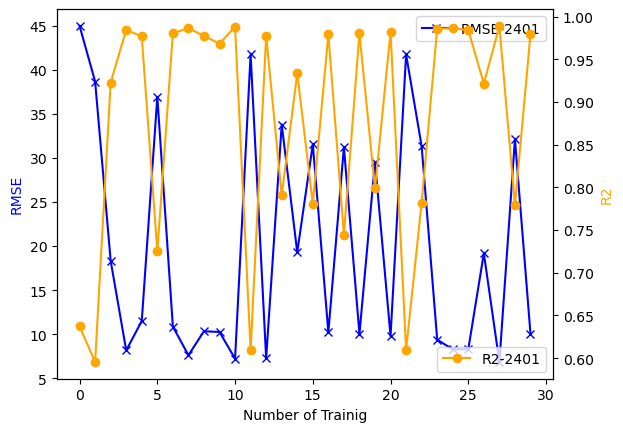

In [13]:
## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(RMSEs2401, '-x', color='blue', label='RMSE-2401')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2s2401, '-o', color='orange', label='R2-2401')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('GRID2401-Training_with_different_randomseeds_for_data_splits.png')

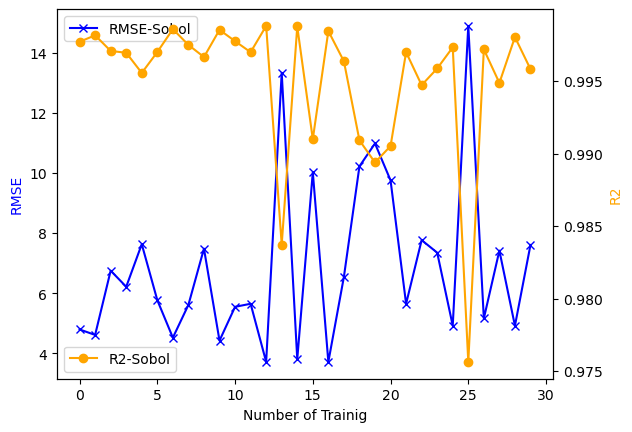

In [14]:
## Sobol Sampling
fig, ax1 = plt.subplots()
ax1.plot(RMSEsSobol, '-x', color='blue', label='RMSE-Sobol')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2sSobol, '-o', color='orange', label='R2-Sobol')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('Sobol-Training_with_different_randomseeds_for_data_splits.png')

## means of RMSE and R2

In [15]:
## Grid Sample 1296
print(f'GRID SAMPLE 1296')
print(f'avg. RMSE: {np.mean(RMSEs1296)}')
print(f'Std Dev: {np.std(RMSEs1296)}')
#print(f'Variance: {np.var(RMSEs1296)}')
print(f'avg. R2: {np.mean(R2s1296)}')
print(f'Std Dev: {np.std(R2s1296)}')
#print(f'Variance: {np.var(R2s1296)}')

print(f'\nGRID SAMPLE 2401')
print(f'avg. RMSE: {np.mean(RMSEs2401)}')
print(f'Std Dev: {np.std(RMSEs2401)}')
#print(f'Variance: {np.var(RMSEs2401)}')
print(f'avg. R2: {np.mean(R2s2401)}')
print(f'Std Dev: {np.std(R2s2401)}')
#print(f'Variance: {np.var(R2s2401)}')

print(f'\nSobol Sampling')
print(f'avg. RMSE: {np.mean(RMSEsSobol)}')
print(f'Std Dev: {np.std(RMSEsSobol)}')
#print(f'Variance: {np.var(RMSEsSobol)}')
print(f'avg. R2: {np.mean(R2sSobol)}')
print(f'Std Dev: {np.std(R2sSobol)}')
#print(f'Variance: {np.var(R2sSobol)}')

GRID SAMPLE 1296
avg. RMSE: 4.435069023742885
Std Dev: 2.2215330071777224
avg. R2: 0.996338800536318
Std Dev: 0.003399410884434162

GRID SAMPLE 2401
avg. RMSE: 19.883642665925358
Std Dev: 12.833898846243438
avg. R2: 0.8779218590151778
Std Dev: 0.1347949773140022

Sobol Sampling
avg. RMSE: 6.89206103168849
Std Dev: 2.7344931739407072
avg. R2: 0.9950909058708238
Std Dev: 0.00493037472497406


## NOTES:
use all other data except the data used for training for testing (not only the 5%)
